<a href="https://colab.research.google.com/github/fjgr/IA_BigData/blob/main/7RO/TAREA%202%20Recorrido%20en%20profundidad%20(RECURSIVIDAD)/7RO_Tarea_2_Recorrido_en_profundidad_(RECURSIVIDAD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Índice
- [Capítulo 1: Crea el laberinto con Backtracking y realiza búsqueda en DFS. "Recorrido en profundidad iterativo"](#capitulo-1)
- [Capítulo 2: Crea el laberinto con Backtracking y realiza búsqueda en BFS. "Recorrido en abanico iterativo"](#capitulo-2)
- [Capítulo 3: Compara la búsqueda DFS y BFS con el mismo laberinto.](#capitulo-3)
- [Capítulo 4: Se añade movimientos en diagonal y tambien se añade más muros (de forma aleatoria) en el interior, con olvido de un porcentaje de puntos por dónde se ha pasado.](#capitulo-4)

<a name="capitulo-1"></a>
# Capítulo 1: Crea el laberinto con Backtracking y realiza búsqueda en DFS

Solución encontrada!
Visualización de MARK (Posiciones visitadas):


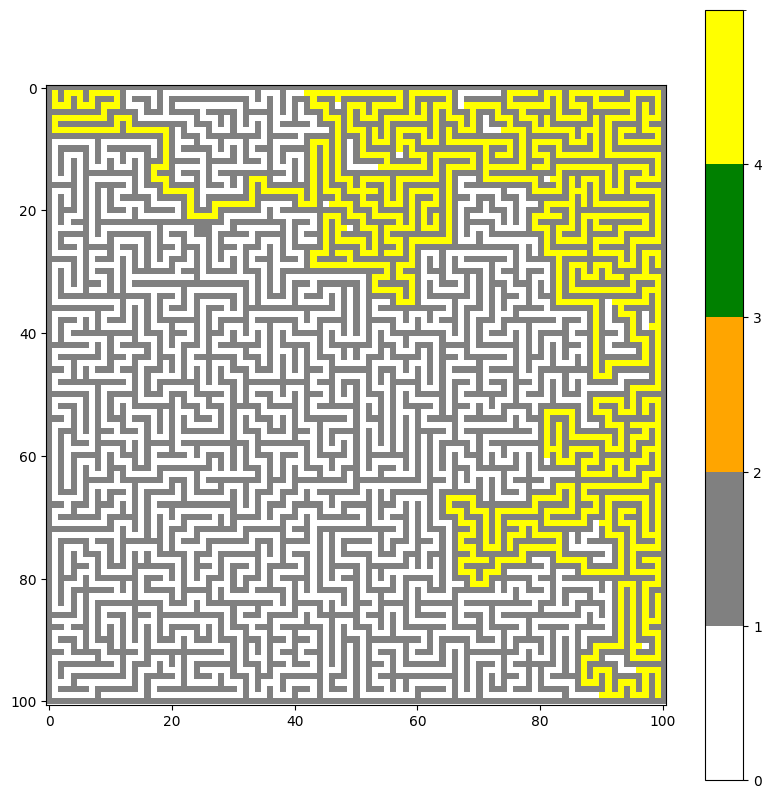

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import random
from collections import deque
import sys

# Aumentar el límite de recursión
sys.setrecursionlimit(10000) # Aumentar el límite a un valor mayor

# Dimensiones del laberinto
N = 101

# Inicializar el laberinto con todas paredes
MAZE = [[1 for _ in range(N)] for _ in range(N)]

# Movimientos posibles (abajo, derecha, arriba, izquierda)
movimientos = [(2, 0), (0, 2), (-2, 0), (0, -2)]

# Función que genera el laberinto con el algoritmo de backtracking
def generar_laberinto_backtracking(x, y):
    # Marca la celda actual como camino
    MAZE[x][y] = 0

    # Orden aleatorio para los movimientos
    random.shuffle(movimientos)

    # Explora cada dirección
    for dx, dy in movimientos:
        nx, ny = x + dx, y + dy
        # Verifica si la nueva posición está dentro del laberinto y no ha sido visitada
        if 1 <= nx < N - 1 and 1 <= ny < N - 1 and MAZE[nx][ny] == 1:
            # Marca el camino intermedio entre las celdas como parte del camino
            MAZE[x + dx // 2][y + dy // 2] = 0
            # Llama recursivamente para continuar generando el laberinto desde la nueva celda
            generar_laberinto_backtracking(nx, ny)

# Generar el laberinto desde la celda inicial
generar_laberinto_backtracking(1, 1)

# Convierte MAZE a un array de NumPy para permitir indexación multidimensional.
MAZE = np.array(MAZE)

# Crear la matriz MARK como copia de MAZE para registrar las posiciones visitadas
MARK = MAZE.copy()

# Función para verificar si una posición es válida y no ha sido visitada
def es_valida(x, y):
    return 0 <= x < N and 0 <= y < N and MAZE[x, y] != 1 and MARK[x, y] < 4

# Función de búsqueda en profundidad iterativa con pila
def dfs_iterativo(inicio, fin):
    pila = [inicio]  # Inicializamos la pila con el punto de inicio
    MARK[inicio[0], inicio[1]] = 4  # Marcar la posición de inicio como visitada

    # Movimientos posibles (arriba, derecha, abajo, izquierda, )
    movimientos = [(0, -1), (1, 0), (0, 1), (-1, 0)]

    while pila:
        x, y = pila.pop()  # Sacar el último elemento de la pila (LIFO)

        # Si llegamos a la posición de fin, terminamos
        if (x, y) == fin:
            print("Solución encontrada!")
            return True

        # Explorar las posiciones adyacentes
        for dx, dy in movimientos:
            nx, ny = x + dx, y + dy
            if es_valida(nx, ny):  # Verificar si es válida y no ha sido visitada
                MARK[nx, ny] = 4  # Marcar como visitada con valor 4
                pila.append((nx, ny))  # Añadir la posición a la pila

    print("No se encontró solución.")
    return False

# Coordenadas de inicio y fin
inicio = (1, 1)
fin = (99, 99)

# Ejecutar el algoritmo DFS iterativo
dfs_iterativo(inicio, fin)

# Crear el mapa de colores personalizado para cada valor
colors = {
    0: "white",    # Pasillo
    1: "grey",     # Borde
    2: "orange",   # Entrada
    3: "green",    # Salida
    4: "yellow"    # Posición visitada
}

# Crear una lista de colores en orden de los valores únicos de la matriz
cmap_values = [colors[val] for val in sorted(colors.keys())]

# Crear un mapa de colores discreto personalizado
cmap = mcolors.ListedColormap(cmap_values)

# Mapa de valores (bounds) para asociar cada color con un rango de valores
bounds = [0, 1, 2, 3, 4, 5]  # Ajustar para que coincida con el número de colores
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Función de visualización de la matriz con el mapa de colores personalizado
def ver_matriz(x):
    plt.figure(figsize=(10, 10))  # Ajustar el tamaño de la visualización
    plt.imshow(x, cmap=cmap, norm=norm)
    plt.colorbar(ticks=np.arange(len(bounds)-1))  # Mostrar leyenda con colores personalizados
    plt.grid(False)
    plt.show()

# Visualizar MAZE y MARK
# print("Visualización de MAZE:")
# ver_matriz(MAZE)

print("Visualización de MARK (Posiciones visitadas):")
ver_matriz(MARK)

<a name="capitulo-2"></a>
# Capítulo 2: Crea el laberinto con Backtracking y realiza búsqueda en BFS

Solución encontrada!
Visualización de MARK (Posiciones visitadas):


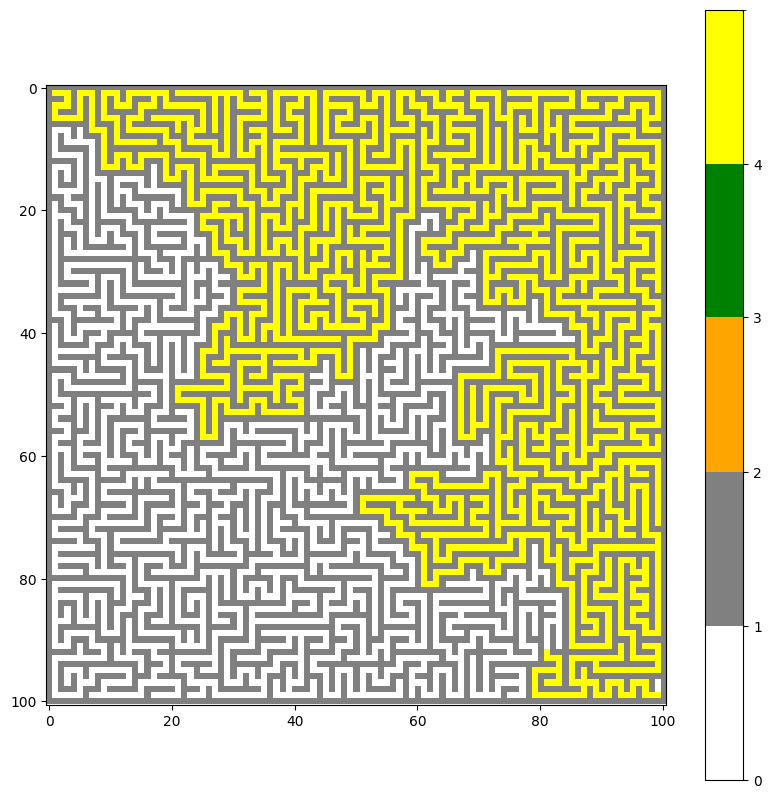

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import random
from collections import deque
import sys

# Aumentar el límite de recursión
sys.setrecursionlimit(10000) # Aumentar el límite a un valor mayor

# Dimensiones del laberinto
N = 101

# Inicializar el laberinto con todas paredes
MAZE = [[1 for _ in range(N)] for _ in range(N)]

# Movimientos posibles (abajo, derecha, arriba, izquierda)
movimientos = [(2, 0), (0, 2), (-2, 0), (0, -2)]

# Función que genera el laberinto con el algoritmo de backtracking
def generar_laberinto_backtracking(x, y):
    # Marca la celda actual como camino
    MAZE[x][y] = 0

    # Orden aleatorio para los movimientos
    random.shuffle(movimientos)

    # Explora cada dirección
    for dx, dy in movimientos:
        nx, ny = x + dx, y + dy
        # Verifica si la nueva posición está dentro del laberinto y no ha sido visitada
        if 1 <= nx < N - 1 and 1 <= ny < N - 1 and MAZE[nx][ny] == 1:
            # Marca el camino intermedio entre las celdas como parte del camino
            MAZE[x + dx // 2][y + dy // 2] = 0
            # Llama recursivamente para continuar generando el laberinto desde la nueva celda
            generar_laberinto_backtracking(nx, ny)

# Generar el laberinto desde la celda inicial
generar_laberinto_backtracking(1, 1)

# Convierte MAZE a un array de NumPy para permitir indexación multidimensional.
MAZE = np.array(MAZE)

# Crear la matriz MARK como copia de MAZE para registrar las posiciones visitadas
MARK = MAZE.copy()

# Función para verificar si una posición es válida y no ha sido visitada
def es_valida(x, y):
    return 0 <= x < N and 0 <= y < N and MAZE[x, y] != 1 and MARK[x, y] < 4

# Función de búsqueda en abanico iterativa con cola
from collections import deque

def bfs_iterativo(inicio, fin):
    cola = deque([inicio])  # Inicializamos la cola con el punto de inicio
    MARK[inicio[0], inicio[1]] = 4  # Marcar la posición de inicio como visitada

    # Movimientos posibles (arriba, derecha, abajo, izquierda)
    movimientos = [(0, -1), (1, 0), (0, 1), (-1, 0)]

    while cola:
        x, y = cola.popleft()  # Sacar el primer elemento de la cola (FIFO)

        # Si llegamos a la posición de fin, terminamos
        if (x, y) == fin:
            print("Solución encontrada!")
            return True

        # Explorar las posiciones adyacentes
        for dx, dy in movimientos:
            nx, ny = x + dx, y + dy
            if es_valida(nx, ny):  # Verificar si es válida y no ha sido visitada
                MARK[nx, ny] = 4  # Marcar como visitada con valor 4
                cola.append((nx, ny))  # Añadir la posición a la cola

    print("No se encontró solución.")
    return False

# Coordenadas de inicio y fin
inicio = (1, 1)
fin = (99, 99)

# Ejecutar el algoritmo BFS iterativo
bfs_iterativo(inicio, fin)

# Crear el mapa de colores personalizado para cada valor
colors = {
    0: "white",    # Pasillo
    1: "grey",     # Borde
    2: "orange",   # Entrada
    3: "green",    # Salida
    4: "yellow"    # Posición visitada
}

# Crear una lista de colores en orden de los valores únicos de la matriz
cmap_values = [colors[val] for val in sorted(colors.keys())]

# Crear un mapa de colores discreto personalizado
cmap = mcolors.ListedColormap(cmap_values)

# Mapa de valores (bounds) para asociar cada color con un rango de valores
bounds = [0, 1, 2, 3, 4, 5]  # Ajustar para que coincida con el número de colores
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Función de visualización de la matriz con el mapa de colores personalizado
def ver_matriz(x):
    plt.figure(figsize=(10, 10))  # Ajustar el tamaño de la visualización
    plt.imshow(x, cmap=cmap, norm=norm)
    plt.colorbar(ticks=np.arange(len(bounds)-1))  # Mostrar leyenda con colores personalizados
    plt.grid(False)
    plt.show()

# Visualizar MAZE y MARK
# print("Visualización de MAZE:")
# ver_matriz(MAZE)

print("Visualización de MARK (Posiciones visitadas):")
ver_matriz(MARK)

<a name="capitulo-3"></a>
# Capítulo 3: Compara la búsqueda DFS y BFS con el mismo laberinto

Solución encontrada!
Solución encontrada!


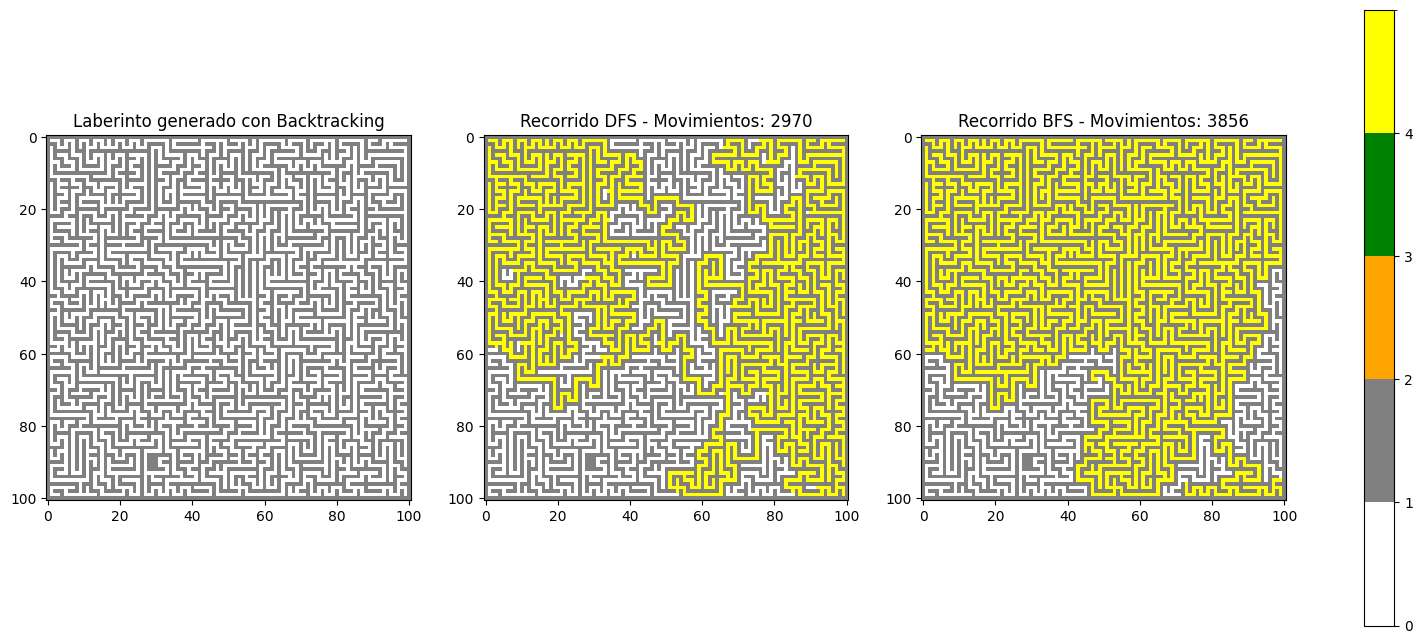

In [32]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import random
from collections import deque
import sys

# Aumentar el límite de recursión
sys.setrecursionlimit(10000) # Aumentar el límite a un valor mayor

# Dimensiones del laberinto
N = 101

# Inicializar el laberinto con todas paredes
MAZE = [[1 for _ in range(N)] for _ in range(N)]


# Movimientos posibles (abajo, derecha, arriba, izquierda)
movimientos = [(2, 0), (0, 2), (-2, 0), (0, -2)]

# Función que genera el laberinto con el algoritmo de backtracking
def generar_laberinto_backtracking(x, y):
    # Marca la celda actual como camino
    MAZE[x][y] = 0

    # Orden aleatorio para los movimientos
    random.shuffle(movimientos)

    # Explora cada dirección
    for dx, dy in movimientos:
        nx, ny = x + dx, y + dy
        # Verifica si la nueva posición está dentro del laberinto y no ha sido visitada
        if 1 <= nx < N - 1 and 1 <= ny < N - 1 and MAZE[nx][ny] == 1:
            # Marca el camino intermedio entre las celdas como parte del camino
            MAZE[x + dx // 2][y + dy // 2] = 0
            # Llama recursivamente para continuar generando el laberinto desde la nueva celda
            generar_laberinto_backtracking(nx, ny)

# Generar el laberinto desde la celda inicial
generar_laberinto_backtracking(1, 1)

# Convierte MAZE a un array de NumPy para permitir indexación multidimensional.
MAZE = np.array(MAZE)

# Crear la matriz MARK como copia de MAZE para registrar las posiciones visitadas
MARK_dfs = MAZE.copy()
MARK_bfs = MAZE.copy()

# Función para verificar si una posición es válida y no ha sido visitada
def es_valida_dfs(x, y):
    return 0 <= x < N and 0 <= y < N and MAZE[x, y] != 1 and MARK_dfs[x, y] < 4

# Función de búsqueda en profundidad iterativa con pila
def dfs_iterativo(inicio, fin):
    pila = [inicio]  # Inicializamos la pila con el punto de inicio
    MARK_dfs[inicio[0], inicio[1]] = 4  # Marcar la posición de inicio como visitada
    movimientos_dfs = 0  # Contador de movimientos

    # Movimientos posibles (arriba, derecha, abajo, izquierda, )
    movimientos = [(0, -1), (1, 0), (0, 1), (-1, 0)]

    while pila:
        x, y = pila.pop()  # Sacar el último elemento de la pila (LIFO)

        # Si llegamos a la posición de fin, terminamos
        if (x, y) == fin:
            print("Solución encontrada!")
            return True, movimientos_dfs

        # Explorar las posiciones adyacentes
        for dx, dy in movimientos:
            nx, ny = x + dx, y + dy
            if es_valida_dfs(nx, ny):  # Verificar si es válida y no ha sido visitada
                MARK_dfs[nx, ny] = 4  # Marcar como visitada con valor 4
                pila.append((nx, ny))  # Añadir la posición a la pila
                movimientos_dfs += 1  # Incrementar el contador de movimientos

    print("No se encontró solución.")
    return False, movimientos_dfs

# Función para verificar si una posición es válida y no ha sido visitada
def es_valida_bfs(x, y):
    return 0 <= x < N and 0 <= y < N and MAZE[x, y] != 1 and MARK_bfs[x, y] < 4

# Función de búsqueda en anchura iterativa con cola
from collections import deque

def bfs_iterativo(inicio, fin):
    cola = deque([inicio])  # Inicializamos la cola con el punto de inicio
    MARK_bfs[inicio[0], inicio[1]] = 4  # Marcar la posición de inicio como visitada
    movimientos_bfs = 0  # Contador de movimientos

    # Movimientos posibles (arriba, derecha, abajo, izquierda)
    movimientos = [(0, -1), (1, 0), (0, 1), (-1, 0)]

    while cola:
        x, y = cola.popleft()  # Sacar el primer elemento de la cola (FIFO)

        # Si llegamos a la posición de fin, terminamos
        if (x, y) == fin:
            print("Solución encontrada!")
            return True, movimientos_bfs

        # Explorar las posiciones adyacentes
        for dx, dy in movimientos:
            nx, ny = x + dx, y + dy
            if es_valida_bfs(nx, ny):  # Verificar si es válida y no ha sido visitada
                MARK_bfs[nx, ny] = 4  # Marcar como visitada con valor 4
                cola.append((nx, ny))  # Añadir la posición a la cola
                movimientos_bfs += 1  # Incrementar el contador de movimientos

    print("No se encontró solución.")
    return False, movimientos_bfs

# Coordenadas de inicio y fin
inicio = (1, 1)
fin = (99, 99)

# Ejecutar el algoritmo DFS y BFS iterativo y contar los movimientos
_, movimientos_dfs = dfs_iterativo(inicio, fin)
_, movimientos_bfs = bfs_iterativo(inicio, fin)

# Crear el mapa de colores personalizado para cada valor
colors = {
    0: "white",    # Pasillo
    1: "grey",     # Borde
    2: "orange",   # Entrada
    3: "green",    # Salida
    4: "yellow"    # Posición visitada
}

# Crear una lista de colores en orden de los valores únicos de la matriz
cmap_values = [colors[val] for val in sorted(colors.keys())]

# Crear un mapa de colores discreto personalizado
cmap = mcolors.ListedColormap(cmap_values)

# Mapa de valores (bounds) para asociar cada color con un rango de valores
bounds = [0, 1, 2, 3, 4, 5]  # Ajustar para que coincida con el número de colores
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Función para visualizar matrices lado a lado
def ver_matrices_lado_a_lado(maze, mark_dfs, mark_bfs, movimientos_dfs, movimientos_bfs):
    fig, axes = plt.subplots(1, 3, figsize=(20, 8))

    # Visualizar MAZE
    axes[0].imshow(maze, cmap=cmap, norm=norm)
    axes[0].set_title("Laberinto generado con Backtracking")
    axes[0].grid(False)

    # Visualizar MARK_dfs con contador de movimientos en el título
    axes[1].imshow(mark_dfs, cmap=cmap, norm=norm)
    axes[1].set_title(f"Recorrido DFS - Movimientos: {movimientos_dfs}")
    axes[1].grid(False)

    # Visualizar MARK_bfs con contador de movimientos en el título
    axes[2].imshow(mark_bfs, cmap=cmap, norm=norm)
    axes[2].set_title(f"Recorrido BFS - Movimientos: {movimientos_bfs}")
    axes[2].grid(False)

    # Barra de color compartida
    plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axes, ticks=np.arange(len(bounds)-1), orientation='vertical')
    plt.show()

# Llamada a la función para mostrar las tres matrices lado a lado
ver_matrices_lado_a_lado(MAZE, MARK_dfs, MARK_bfs, movimientos_dfs, movimientos_bfs)

<a name="capitulo-4"></a>
# Capítulo 4: Se añade movimientos en diagonal y tambien se añade más muros (de forma aleatoria) en el interior, con olvido de un porcentaje de puntos por dónde se ha pasado.


Solución encontrada!
Visualización de MARK (Posiciones visitadas):


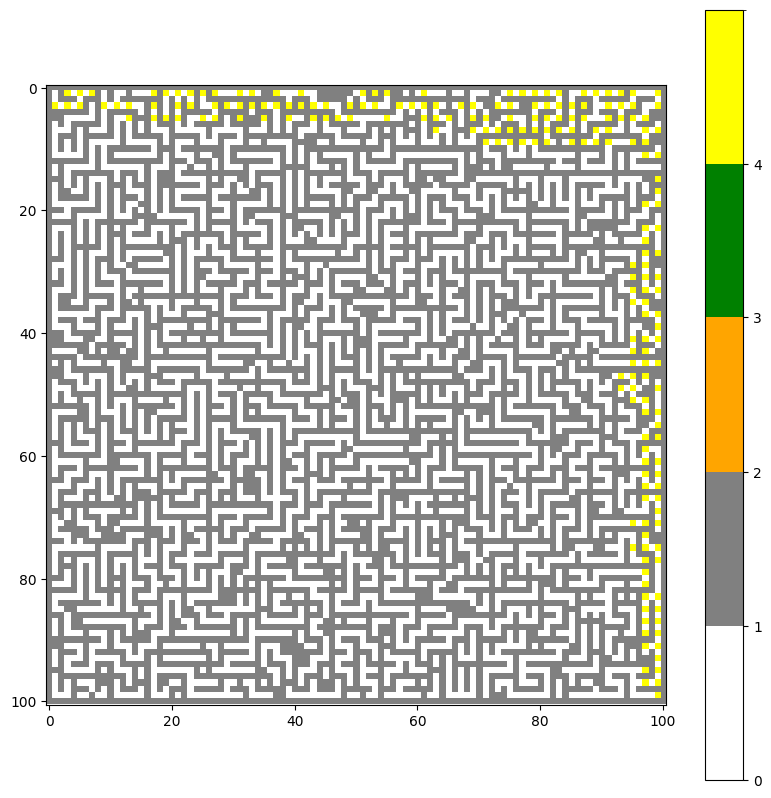

In [54]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import random
from collections import deque
import sys

# Aumentar el límite de recursión
sys.setrecursionlimit(10000) # Aumentar el límite a un valor mayor

# Dimensiones del laberinto
N = 101

# Inicializar el laberinto con todas paredes
MAZE = [[1 for _ in range(N)] for _ in range(N)]

# Movimientos posibles (abajo, derecha, arriba, izquierda)
movimientos = [(2, 0), (0, 2), (-2, 0), (0, -2)]

# Función que genera el laberinto con el algoritmo de backtracking
def generar_laberinto_backtracking(x, y):
    # Marca la celda actual como camino
    MAZE[x][y] = 0

    # Orden aleatorio para los movimientos
    random.shuffle(movimientos)

    # Explora cada dirección
    for dx, dy in movimientos:
        nx, ny = x + dx, y + dy
        # Verifica si la nueva posición está dentro del laberinto y no ha sido visitada
        if 1 <= nx < N - 1 and 1 <= ny < N - 1 and MAZE[nx][ny] == 1:
            # Marca el camino intermedio entre las celdas como parte del camino
            MAZE[x + dx // 2][y + dy // 2] = 0
            # Llama recursivamente para continuar generando el laberinto desde la nueva celda
            generar_laberinto_backtracking(nx, ny)

# Generar el laberinto desde la celda inicial
generar_laberinto_backtracking(1, 1)

# --------------------------------------------------------------------------------------------
# - Añadir paredes aleatorias en el interior (10%)
# --------------------------------------------------------------------------------------------
def agregar_paredes_aleatorias(probabilidad):
    for i in range(1, N - 1):
        for j in range(1, N - 1):
            # Solo añadir pared si es un camino y aleatoriamente con la probabilidad dada
            if MAZE[i][j] == 0 and random.random() < probabilidad:
                MAZE[i][j] = 1

# Añadir paredes con una probabilidad del 10% en las celdas de camino
agregar_paredes_aleatorias(probabilidad=0.10)

# -------------------------------------------------------------------------------------------
# - Fin paredes aleatorias
# -------------------------------------------------------------------------------------------

# Convierte MAZE a un array de NumPy para permitir indexación multidimensional.
MAZE = np.array(MAZE)

# Crear la matriz MARK como copia de MAZE para registrar las posiciones visitadas
MARK = MAZE.copy()

# Función para verificar si una posición es válida y no ha sido visitada
def es_valida(x, y):
    return 0 <= x < N and 0 <= y < N and MAZE[x, y] != 1 and MARK[x, y] < 4

# Función de búsqueda en profundidad iterativa con pila
def dfs_iterativo(inicio, fin):
    pila = [inicio]  # Inicializamos la pila con el punto de inicio
    MARK[inicio[0], inicio[1]] = 4  # Marcar la posición de inicio como visitada

    # ------------------------------------------------------------------------------------
    # - Movimientos para la búsqueda (incluyendo diagonales)
    # ------------------------------------------------------------------------------------
    movimientos_busqueda = [
        (0, -1), (1, 0), (0, 1), (-1, 0),   # Movimientos básicos
        (1, 1), (-1, -1), (1, -1), (-1, 1)  # Movimientos diagonales
    ]

    while pila:
        x, y = pila.pop()  # Sacar el último elemento de la pila (LIFO)

        # Si llegamos a la posición de fin, terminamos
        if (x, y) == fin:
            print("Solución encontrada!")
            return True

        # Explorar las posiciones adyacentes
        for dx, dy in movimientos:
            nx, ny = x + dx, y + dy
            if es_valida(nx, ny):  # Verificar si es válida y no ha sido visitada
                MARK[nx, ny] = 4  # Marcar como visitada con valor 4
                pila.append((nx, ny))  # Añadir la posición a la pila

    print("No se encontró solución.")
    return False

# Coordenadas de inicio y fin
inicio = (1, 1)
fin = (99, 99)

# Ejecutar el algoritmo DFS iterativo
dfs_iterativo(inicio, fin)

# ---------------------------------------------------------------------------------------------------
# - Función para "olvidar" un porcentaje del camino de solución
# ---------------------------------------------------------------------------------------------------
def olvidar_puntos_solucion(porcentaje):
    # Extrae las posiciones de las celdas que son parte del camino de solución
    puntos_solucion = [(i, j) for i in range(N) for j in range(N) if MARK[i][j] == 4]

    # Calcular el número de puntos a olvidar
    num_a_olvidar = int(len(puntos_solucion) * porcentaje)

    # Seleccionar aleatoriamente las celdas a olvidar y desmarcarlas
    puntos_a_olvidar = random.sample(puntos_solucion, num_a_olvidar)
    for i, j in puntos_a_olvidar:
        MARK[i][j] = 0

# Olvidar un 20% de los puntos en la solución
olvidar_puntos_solucion(porcentaje=0.20)
# --------------------------------------------------------------------------------------------------
# - FIN olvidar un porcentaje de puntos por dónde se ha pasado
# --------------------------------------------------------------------------------------------------

# Crear el mapa de colores personalizado para cada valor
colors = {
    0: "white",    # Pasillo
    1: "grey",     # Borde
    2: "orange",   # Entrada
    3: "green",    # Salida
    4: "yellow"    # Posición visitada
}

# Crear una lista de colores en orden de los valores únicos de la matriz
cmap_values = [colors[val] for val in sorted(colors.keys())]

# Crear un mapa de colores discreto personalizado
cmap = mcolors.ListedColormap(cmap_values)

# Mapa de valores (bounds) para asociar cada color con un rango de valores
bounds = [0, 1, 2, 3, 4, 5]  # Ajustar para que coincida con el número de colores
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Función de visualización de la matriz con el mapa de colores personalizado
def ver_matriz(x):
    plt.figure(figsize=(10, 10))  # Ajustar el tamaño de la visualización
    plt.imshow(x, cmap=cmap, norm=norm)
    plt.colorbar(ticks=np.arange(len(bounds)-1))  # Mostrar leyenda con colores personalizados
    plt.grid(False)
    plt.show()

# ver_matriz(MARK)
print("Visualización de MARK (Posiciones visitadas):")
ver_matriz(MARK)